/home/vipuser/miniconda3/envs/emoenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/vipuser/miniconda3/envs/emoenv/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Available splits: dict_keys(['train', 'validation', 'test'])
Train split size: 16000
Validation split size: 2000
Test split size: 2000
Emotion labels: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

Label distribution in the training set:
sadness   : 4666
anger     : 2159
love      : 1304
surprise  : 572
fear      : 1937
joy       : 5362


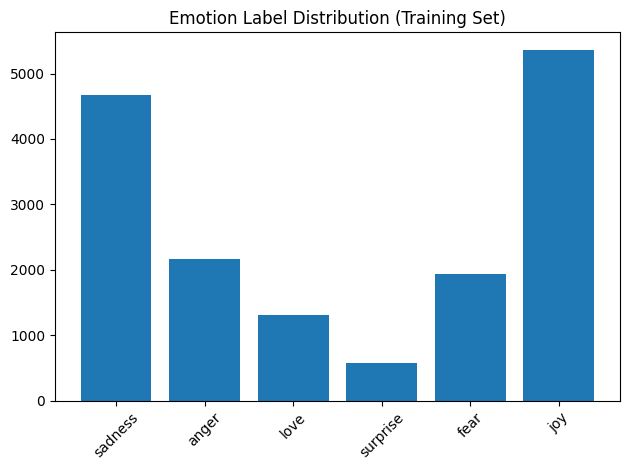


Sample tokenization:
Text: i didnt feel humiliated
Tokens: ['i', 'Ġdidnt', 'Ġfeel', 'Ġhumiliated']

Text: i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
Tokens: ['i', 'Ġcan', 'Ġgo', 'Ġfrom', 'Ġfeeling', 'Ġso', 'Ġhopeless', 'Ġto', 'Ġso', 'Ġdamned', 'Ġhopeful', 'Ġjust', 'Ġfrom', 'Ġbeing', 'Ġaround', 'Ġsomeone', 'Ġwho', 'Ġcares', 'Ġand', 'Ġis', 'Ġawake']

Text: im grabbing a minute to post i feel greedy wrong
Tokens: ['im', 'Ġgrabbing', 'Ġa', 'Ġminute', 'Ġto', 'Ġpost', 'Ġi', 'Ġfeel', 'Ġgreedy', 'Ġwrong']



In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer
from collections import Counter
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset("dair-ai/emotion")

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Step 1: Show available splits
print("Available splits:", dataset.keys())

# Step 2: Print number of examples per split
for split in dataset:
    print(f"{split.capitalize()} split size: {len(dataset[split])}")

# Step 3: Print label names
label_names = dataset["train"].features["label"].names
print("Emotion labels:", label_names)

# Step 4: Count label distribution in the training set
train_labels = [label_names[example["label"]] for example in dataset["train"]]
label_counts = Counter(train_labels)

print("\nLabel distribution in the training set:")
for label, count in label_counts.items():
    print(f"{label:10}: {count}")

# Optional: visualize class distribution
plt.bar(label_counts.keys(), label_counts.values())
plt.title("Emotion Label Distribution (Training Set)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Tokenize a few samples
print("\nSample tokenization:")
for example in dataset["train"].select(range(3)):
    text = example["text"]
    tokens = tokenizer.tokenize(text)
    print(f"Text: {text}")
    print(f"Tokens: {tokens}")
    print()


In [ ]:
from datasets import load_dataset

# Load dataset
dataset = load_dataset("dair-ai/emotion")

# Show one example
print(dataset["train"][0])


<generator object <genexpr> at 0x7f3c34eada10>


In [4]:
for i in range(3):
    print(dataset["train"][i])  # Show first 3 examples

{'text': 'i didnt feel humiliated', 'label': 0}
{'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'label': 0}
{'text': 'im grabbing a minute to post i feel greedy wrong', 'label': 3}
